<a href="https://colab.research.google.com/github/BhaskarJB/BhaskarJB/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [4]:
df=pd.read_csv("Dataset.csv")

In [5]:
df.head()

,Unnamed: 0,State,District,Population,Children_Between_1_to_2_years,Total_Arthritis_Patient,Arthritis_Patient_Male,Arthritis_Patient_Female,Children_Vaccinated,Children_Immunized,Children_Vaccinated_at_Birth,Children_Not_Vaccinated,Total_Children_Weighted,Children_Weighted_less_than_2.5_Kg,Women_Aged_15_49_years
0,0,Assam,Barpeta,64606,2371,1072.0,832.0,1328.0,76.5,62.1,67.7,4.3,55.3,22.5,12208.5
1,1,Assam,Bongaigaon,84012,2451,929.0,701.0,1171.0,67.8,52.4,73.7,3.4,55.7,21.6,16157.0
2,2,Assam,Cachar,127158,5709,2964.0,2448.0,3474.0,71.3,64.5,82.0,2.7,61.7,27.8,22614.5
3,3,Assam,Darrang,29048,984,1557.0,1360.0,1766.0,79.3,56.4,76.3,5.3,65.0,25.2,5225.5
4,4,Assam,Dhemaji,75451,3467,1109.0,958.0,1265.0,80.4,66.6,78.5,7.5,74.1,14.5,13844.0


In [6]:
district=df['District'].unique()

In [7]:
import numpy as np
np.array(district)

array(['Barpeta', 'Bongaigaon', 'Cachar', 'Darrang', 'Dhemaji', 'Dhubri',
       'Dibrugarh', 'Goalpara', 'Golaghat', 'Hailakandi', 'Jorhat',
       'Kamrup', 'Karbi Anglong', 'Karimganj', 'Kokrajhar', 'Lakhimpur',
       'Marigaon', 'Nagaon', 'Nalbari', 'North Cachar Hills', 'Sibsagar',
       'Sonitpur', 'Tinsukia', 'Araria', 'Aurangabad', 'Banka',
       'Begusarai', 'Bhagalpur', 'Bhojpur', 'Buxar', 'Darbhanga', 'Gaya',
       'Gopalganj', 'Jamui', 'Jehanabad', 'Kaimur (Bhabua)', 'Katihar',
       'Khagaria', 'Kishanganj', 'Lakhisarai', 'Madhepura', 'Madhubani',
       'Munger', 'Muzaffarpur', 'Nalanda', 'Nawada', 'Pashchim Champaran',
       'Patna', 'Purba Champaran', 'Purnia', 'Rohtas', 'Saharsa',
       'Samastipur', 'Saran', 'Sheikhpura', 'Sheohar', 'Sitamarhi',
       'Siwan', 'Supaul', 'Vaishali', 'Bastar', 'Bilaspur', 'Dantewada',
       'Dhamtari', 'Durg', 'Janjgir-Champa', 'Jashpur', 'Kanker',
       'Kawardha', 'Korba', 'Koriya', 'Mahasamund', 'Raigarh', 'Raipur',
       

In [8]:
#district.sort()
print(len(district))

284


In [9]:
dist={}
for i in range(len(district)):
    dist[district[i]]=i
df['District']=df.District.astype(object)
df['District'].replace(dist,inplace=True)
print(df['District'])

0        0
1        1
2        2
3        3
4        4
      ... 
279    279
280    280
281    281
282    282
283    283
Name: District, Length: 284, dtype: int64


In [10]:
df.head()

,Unnamed: 0,State,District,Population,Children_Between_1_to_2_years,Total_Arthritis_Patient,Arthritis_Patient_Male,Arthritis_Patient_Female,Children_Vaccinated,Children_Immunized,Children_Vaccinated_at_Birth,Children_Not_Vaccinated,Total_Children_Weighted,Children_Weighted_less_than_2.5_Kg,Women_Aged_15_49_years
0,0,Assam,0,64606,2371,1072.0,832.0,1328.0,76.5,62.1,67.7,4.3,55.3,22.5,12208.5
1,1,Assam,1,84012,2451,929.0,701.0,1171.0,67.8,52.4,73.7,3.4,55.7,21.6,16157.0
2,2,Assam,2,127158,5709,2964.0,2448.0,3474.0,71.3,64.5,82.0,2.7,61.7,27.8,22614.5
3,3,Assam,3,29048,984,1557.0,1360.0,1766.0,79.3,56.4,76.3,5.3,65.0,25.2,5225.5
4,4,Assam,4,75451,3467,1109.0,958.0,1265.0,80.4,66.6,78.5,7.5,74.1,14.5,13844.0


In [11]:
df['Sum']=df['Total_Arthritis_Patient']+df['Children_Not_Vaccinated']*1000+df['Women_Aged_15_49_years']

In [12]:
np.mean(df['Sum'])

19854.591109154946

In [13]:
for i in range(len(df['Sum'])):
    if df['Sum'][i]>19854.591109154946:
        df['Sum'][i]=1
    else:
        df['Sum'][i]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df['Sum']

0      0.0
1      1.0
2      1.0
3      0.0
4      1.0
      ... 
279    1.0
280    1.0
281    1.0
282    1.0
283    1.0
Name: Sum, Length: 284, dtype: float64

In [15]:
df.describe()

,Unnamed: 0,District,Population,Children_Between_1_to_2_years,Total_Arthritis_Patient,Arthritis_Patient_Male,Arthritis_Patient_Female,Children_Vaccinated,Children_Immunized,Children_Vaccinated_at_Birth,Children_Not_Vaccinated,Total_Children_Weighted,Children_Weighted_less_than_2.5_Kg,Women_Aged_15_49_years,Sum
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,141.500000,141.500000,74178.753521,2797.573944,1669.219894,1294.553521,2056.383275,76.127570,65.148415,77.996972,4.501549,56.796373,25.028556,13683.821919,0.422535
std,82.127949,82.127949,38613.108658,1466.468416,1262.853571,1015.984674,1573.960548,12.276199,14.546203,11.760262,4.243642,21.452351,8.894126,7189.642052,0.494835
min,0.000000,0.000000,13892.000000,623.000000,49.000000,29.000000,70.000000,32.090000,24.900000,32.500000,0.160000,10.130000,5.420000,2384.000000,0.000000
25%,70.750000,70.750000,49222.500000,1818.000000,757.385000,583.245000,958.767500,68.742500,54.805000,70.667500,1.900000,38.707500,18.962500,9033.500000,0.000000
50%,141.500000,141.500000,65206.500000,2499.500000,1328.555000,1003.845000,1630.220000,77.385000,66.125000,80.500000,3.240000,55.850000,23.605000,12139.250000,0.000000
75%,212.250000,212.250000,88998.500000,3434.250000,2264.247500,1710.250000,2762.960000,85.882500,76.800000,87.000000,5.742500,74.675000,30.325000,16172.500000,1.000000
max,283.000000,283.000000,303009.000000,11814.000000,7910.000000,7203.000000,8633.000000,96.550000,92.100000,96.940000,30.670000,95.470000,54.700000,55407.500000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          284 non-null    int64  
 1   State                               284 non-null    object 
 2   District                            284 non-null    int64  
 3   Population                          284 non-null    int64  
 4   Children_Between_1_to_2_years       284 non-null    int64  
 5   Total_Arthritis_Patient             284 non-null    float64
 6   Arthritis_Patient_Male              284 non-null    float64
 7   Arthritis_Patient_Female            284 non-null    float64
 8   Children_Vaccinated                 284 non-null    float64
 9   Children_Immunized                  284 non-null    float64
 10  Children_Vaccinated_at_Birth        284 non-null    float64
 11  Children_Not_Vaccinated             284 non-n

In [17]:
df.drop(columns=['State','Population','Children_Between_1_to_2_years','Arthritis_Patient_Male','Arthritis_Patient_Female','Children_Vaccinated','Children_Immunized','Children_Vaccinated_at_Birth','Total_Children_Weighted','Children_Weighted_less_than_2.5_Kg'],inplace=True)

In [18]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [19]:
print(df.columns)

Index(['District', 'Total_Arthritis_Patient', 'Children_Not_Vaccinated',
       'Women_Aged_15_49_years', 'Sum'],
      dtype='object')


In [20]:
df.head()

,District,Total_Arthritis_Patient,Children_Not_Vaccinated,Women_Aged_15_49_years,Sum
0,0,1072.0,4.3,12208.5,0.0
1,1,929.0,3.4,16157.0,1.0
2,2,2964.0,2.7,22614.5,1.0
3,3,1557.0,5.3,5225.5,0.0
4,4,1109.0,7.5,13844.0,1.0


In [21]:
df['Total']=df['Total_Arthritis_Patient']+df['Children_Not_Vaccinated']*1000+df['Women_Aged_15_49_years']

In [22]:
df.head()

,District,Total_Arthritis_Patient,Children_Not_Vaccinated,Women_Aged_15_49_years,Sum,Total
0,0,1072.0,4.3,12208.5,0.0,17580.5
1,1,929.0,3.4,16157.0,1.0,20486.0
2,2,2964.0,2.7,22614.5,1.0,28278.5
3,3,1557.0,5.3,5225.5,0.0,12082.5
4,4,1109.0,7.5,13844.0,1.0,22453.0


In [23]:
df.info

<bound method DataFrame.info of      District  Total_Arthritis_Patient  ...  Sum     Total
0           0                  1072.00  ...  0.0  17580.50
1           1                   929.00  ...  1.0  20486.00
2           2                  2964.00  ...  1.0  28278.50
3           3                  1557.00  ...  0.0  12082.50
4           4                  1109.00  ...  1.0  22453.00
..        ...                      ...  ...  ...       ...
279       279                  5884.42  ...  1.0  27875.92
280       280                  4110.77  ...  1.0  33409.77
281       281                  1332.66  ...  1.0  46335.16
282       282                  1612.24  ...  1.0  20175.74
283       283                   851.41  ...  1.0  21951.91

[284 rows x 6 columns]>

In [24]:
X = df.iloc[:,[0,5]].values

In [25]:
print(X)

[[0.0000000e+00 1.7580500e+04]
 [1.0000000e+00 2.0486000e+04]
 [2.0000000e+00 2.8278500e+04]
 [3.0000000e+00 1.2082500e+04]
 [4.0000000e+00 2.2453000e+04]
 [5.0000000e+00 1.9552000e+04]
 [6.0000000e+00 2.4781500e+04]
 [7.0000000e+00 2.0933000e+04]
 [8.0000000e+00 2.2405500e+04]
 [9.0000000e+00 1.3444000e+04]
 [1.0000000e+01 4.3000500e+04]
 [1.1000000e+01 3.4046000e+04]
 [1.2000000e+01 2.2575000e+04]
 [1.3000000e+01 1.6884000e+04]
 [1.4000000e+01 7.4845000e+03]
 [1.5000000e+01 8.3400000e+03]
 [1.6000000e+01 2.9742500e+04]
 [1.7000000e+01 2.6440000e+04]
 [1.8000000e+01 7.4390000e+03]
 [1.9000000e+01 1.5426000e+04]
 [2.0000000e+01 1.7365500e+04]
 [2.1000000e+01 2.9623500e+04]
 [2.2000000e+01 3.0877500e+04]
 [2.3000000e+01 2.1586500e+04]
 [2.4000000e+01 1.6462500e+04]
 [2.5000000e+01 1.9821000e+04]
 [2.6000000e+01 2.1443500e+04]
 [2.7000000e+01 1.6502000e+04]
 [2.8000000e+01 2.3824000e+04]
 [2.9000000e+01 2.5286000e+04]
 [3.0000000e+01 1.6981000e+04]
 [3.1000000e+01 1.4158000e+04]
 [3.2000

In [26]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

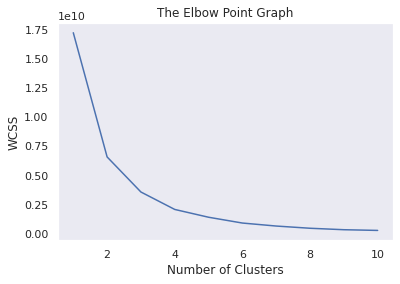

In [31]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(False)
plt.show()

In [32]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[2 2 1 0 2 2 2 2 2 0 3 1 2 0 0 0 1 1 0 0 2 1 1 2 0 2 2 0 2 1 2 0 2 0 1 2 2
 1 2 1 2 1 2 2 2 2 0 1 1 0 2 2 2 2 0 2 2 1 2 2 0 2 2 2 1 2 0 0 0 1 0 0 2 1
 0 2 2 2 2 1 2 2 1 2 1 1 2 2 0 1 2 1 1 3 2 0 0 2 2 0 0 0 0 2 0 0 0 0 0 2 2
 1 2 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 2 0 2 2 0 2
 0 0 0 2 1 0 0 0 0 3 0 0 0 0 0 2 2 0 0 0 0 2 2 0 0 1 2 0 2 0 0 2 0 0 2 0 0
 2 0 2 0 2 1 0 0 2 2 0 0 2 2 2 0 1 0 2 2 1 1 2 1 2 3 0 2 2 0 0 0 0 1 2 2 0
 2 2 2 0 0 2 2 2 2 1 0 2 0 2 2 2 0 1 0 1 1 2 2 0 2 2 0 0 0 2 2 2 0 2 0 1 0
 0 0 0 1 0 3 1 1 1 0 2 2 1 1 1 0 3 1 2 3 1 1 3 2 2]


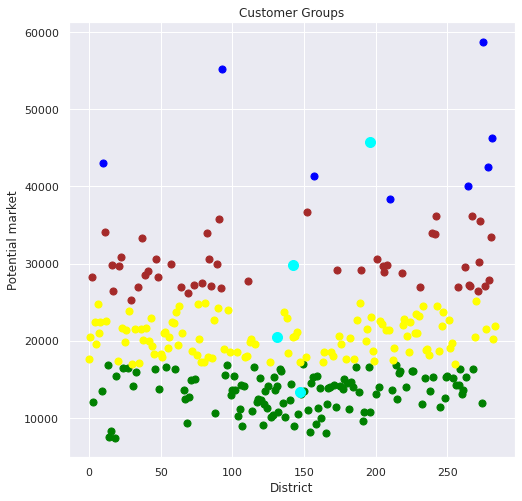

In [36]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='brown', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')
# plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='green', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('District')
plt.ylabel('Potential market')
plt.show()